# Perceptron

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
df=load_boston()

In [3]:
y=df.target
df = pd.DataFrame(df.data, columns=df.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

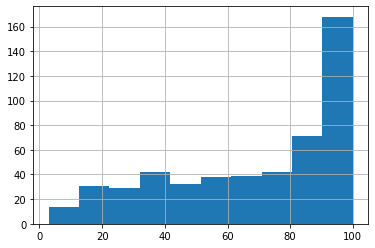

In [5]:
df['AGE'].hist()

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [13]:
inputs=[1,2,3]
weights=[0.2,0.5,-0.3]
bias=0.5

In [14]:
output=(inputs[0]*weights[0]+
        inputs[1]*weights[1]+
        inputs[2]*weights[2]+bias)

In [15]:
print(output)

0.8


In [17]:
inputs=[[1,2,3],
        [4,5,6],
        [7,8,9]]

In [19]:
np.array(inputs).shape

(3, 3)

In [20]:
inputs=[1,2,3]
weights=[0.2,0.5,-0.3]
bias=0.5

In [23]:
output=np.dot(weights,inputs)+bias

In [24]:
print(output)

0.8


In [26]:
inputs=[[1,2,3],
        [4,5,6],
        [7,8,9]]
weights=[[0.3,-0.2,0.4],
        [0.9,-0.2,-0.1],
        [-0.7,0.8,0.9]]
bias=[6,3,-2]

In [27]:
output=np.dot(weights,inputs)+bias

In [28]:
print(output)

[[ 8.3  5.8  1.3]
 [ 5.4  3.  -1.4]
 [14.8 12.8  8.8]]


In [29]:
output=np.dot(np.array(weights).T,inputs)+bias

In [30]:
print(output)

[[ 5.   2.5 -2. ]
 [10.6  8.   3.4]
 [12.3 10.5  6.7]]


# Entrainement du multi-layers perceptron

In [44]:
model=MLPRegressor(random_state=1,max_iter=10000)

In [34]:
model.fit(df,y)

MLPRegressor(max_iter=500, random_state=1)

In [36]:
model.predict(df[:3])

array([30.08548399, 24.68490938, 30.32640805])

In [37]:
y[:3]

array([24. , 21.6, 34.7])

In [38]:
model.score(df,y)

0.8214129210998993

In [41]:
x_train,x_test,y_train,y_test=train_test_split(df,y,random_state=1)

In [42]:
x_train.shape,x_test.shape

((379, 13), (127, 13))

In [45]:
model.fit(x_train,y_train)

MLPRegressor(max_iter=10000, random_state=1)

In [46]:
model.score(x_test,y_test)

0.809538619484653

In [47]:
model.score(x_train,y_train)

0.8109162186054987

In [64]:
model=MLPRegressor(random_state=1,max_iter=10000,hidden_layer_sizes=(64,256,64),solver='adam',learning_rate_init=0.001)

In [65]:
model.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(64, 256, 64), max_iter=10000, random_state=1)

In [66]:
model.score(x_train,y_train)

0.5856241998004235

In [67]:
model.score(x_test,y_test)

0.5513891940496122